In [2]:
# importing data
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# importing dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Liam McCann\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_US = df_DA_US.dropna(subset= "salary_year_avg")
df_DA_US = df_DA_US[df_DA_US["salary_year_avg"] > 0]


In [4]:
df_DA_US = df_DA_US.explode("job_skills")
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
df_DA_top_pay = df_DA_US_group.sort_values(by = "median", ascending = False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by = "count", ascending = False).head(10).sort_values(by="median", ascending = False)

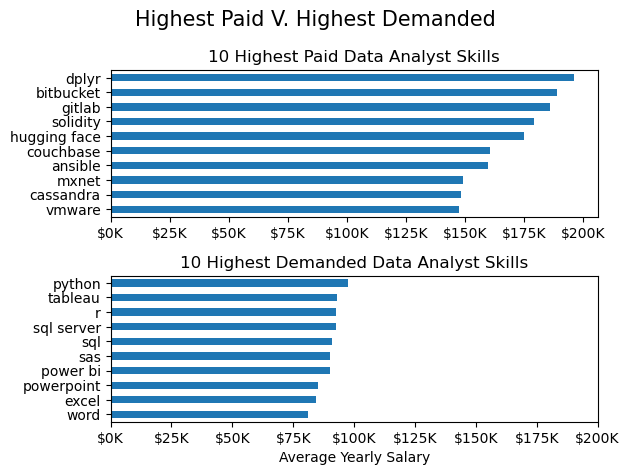

In [5]:
fig, ax = plt.subplots(2, 1)
 
df_DA_top_pay[::-1].plot(kind = "barh", y = "median", ax=ax[0], legend = False)

ax[0].set_title("10 Highest Paid Data Analyst Skills")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

df_DA_skills[::-1].plot(kind = "barh", y = "median", ax=ax[1], legend = False)
ax[1].set_title("10 Highest Demanded Data Analyst Skills")
ax[1].set_xlabel("Average Yearly Salary")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax[1].set_xlim(0,200_000)


plt.suptitle("Highest Paid V. Highest Demanded", fontsize=15)
plt.tight_layout()
plt.show()
